# Taller Programación Dinámica

Omar Toledo

Jose Miguel

### Ejercicio 1

#### Entradas y Salidas

| E/S | Nombre | Tipo | Descripción |
|-----|--------|------|-------------|
| E   |   A    | Array[0,n)[0,m) of **nat** | Matriz de naturales que representa la altura en una posición específica |
| S   |   b    | **bool** | Booleano que determina si el robot puede llegar al final del campo rectangular|
| S   |   p    | Array[0,k) of **char** | Secuencia de pasos para llegar al final del campo rectangular |

#### Ecuación de Recurrencia

Definimos una función $S$ con las siguientes características:

$$P : \mathbb{N} \times \mathbb{N} \mapsto \mathbb{B}$$

Esta función recibe dos numeros naturales $i,j$; con estos, la función retorna si es posible llegar a la posición $i,j$ del rectangulo a partir de :

$$P(i,j) = \left\{ 
    \begin{array}{lcccr}
        \top & & \text{si} & & i=0 \wedge j=0 \\
        P(i-1,j) \wedge | A[i-1][j] - A[i][j] | \leq 1 & & \text{si} & & i>0 \wedge j=0 \\
        P(i,j-1) \wedge | A[i][j-1] - A[i][j] | \leq 1  & & \text{si} & & i=0 \wedge j>0 \\
         & & \text{si} & & i>0 \wedge j>0 \\
    \end{array}
\right.$$

#### Grafo de Necesidades

#### Desarrollo de algoritmo de Programación Dinámica

In [ ]:
import numpy as np
import sys

def DynamicProgramming_RobotMove(A):
    n,m = A.shape
    P = np.zeros(shape=(n,m))

### Ejercicio 3

#### Entradas y Salidas

| E/S | Nombre | Tipo | Descripción |
|-----|--------|------|-------------|
| E   |   A    | Array[0,n) of **nat** | Arreglo de naturales al que se le busca su suma mas grande terminada en 0 |
| S   |   s    | **nat** | Suma mas grande terminada en 0 |
| S   |   S    | Array[0,n) of **bool** | Arreglo de booleanos que representa el conjunto que soluciona el problema |

#### Ecuación de Recurrencia

Definimos una función $S$ con las siguientes características:

$$S : \mathbb{N} \times \mathbb{N} \mapsto \mathbb{N}$$

Esta función recibe dos numeros naturales $i,j$; con estos, la función retorna la suma más grande posible de los primeros $i$ elementos del arreglo que termine en $j$. Se define la siguiente recurrencia:

$$S(i,j) = \left\{ 
    \begin{array}{lcccr}
        0 & & \text{si} & & i=0 \wedge j=0 \\
        -\infty & & \text{si} & & i>0 \wedge j=0 \\
        \max\left( S(i,j-1) , S((i-A[j-1]) \mod 10,j-1) + A[j-1] \right) & & \text{si} & & j>0 \\
    \end{array}
\right.$$

#### Grafo de Necesidades

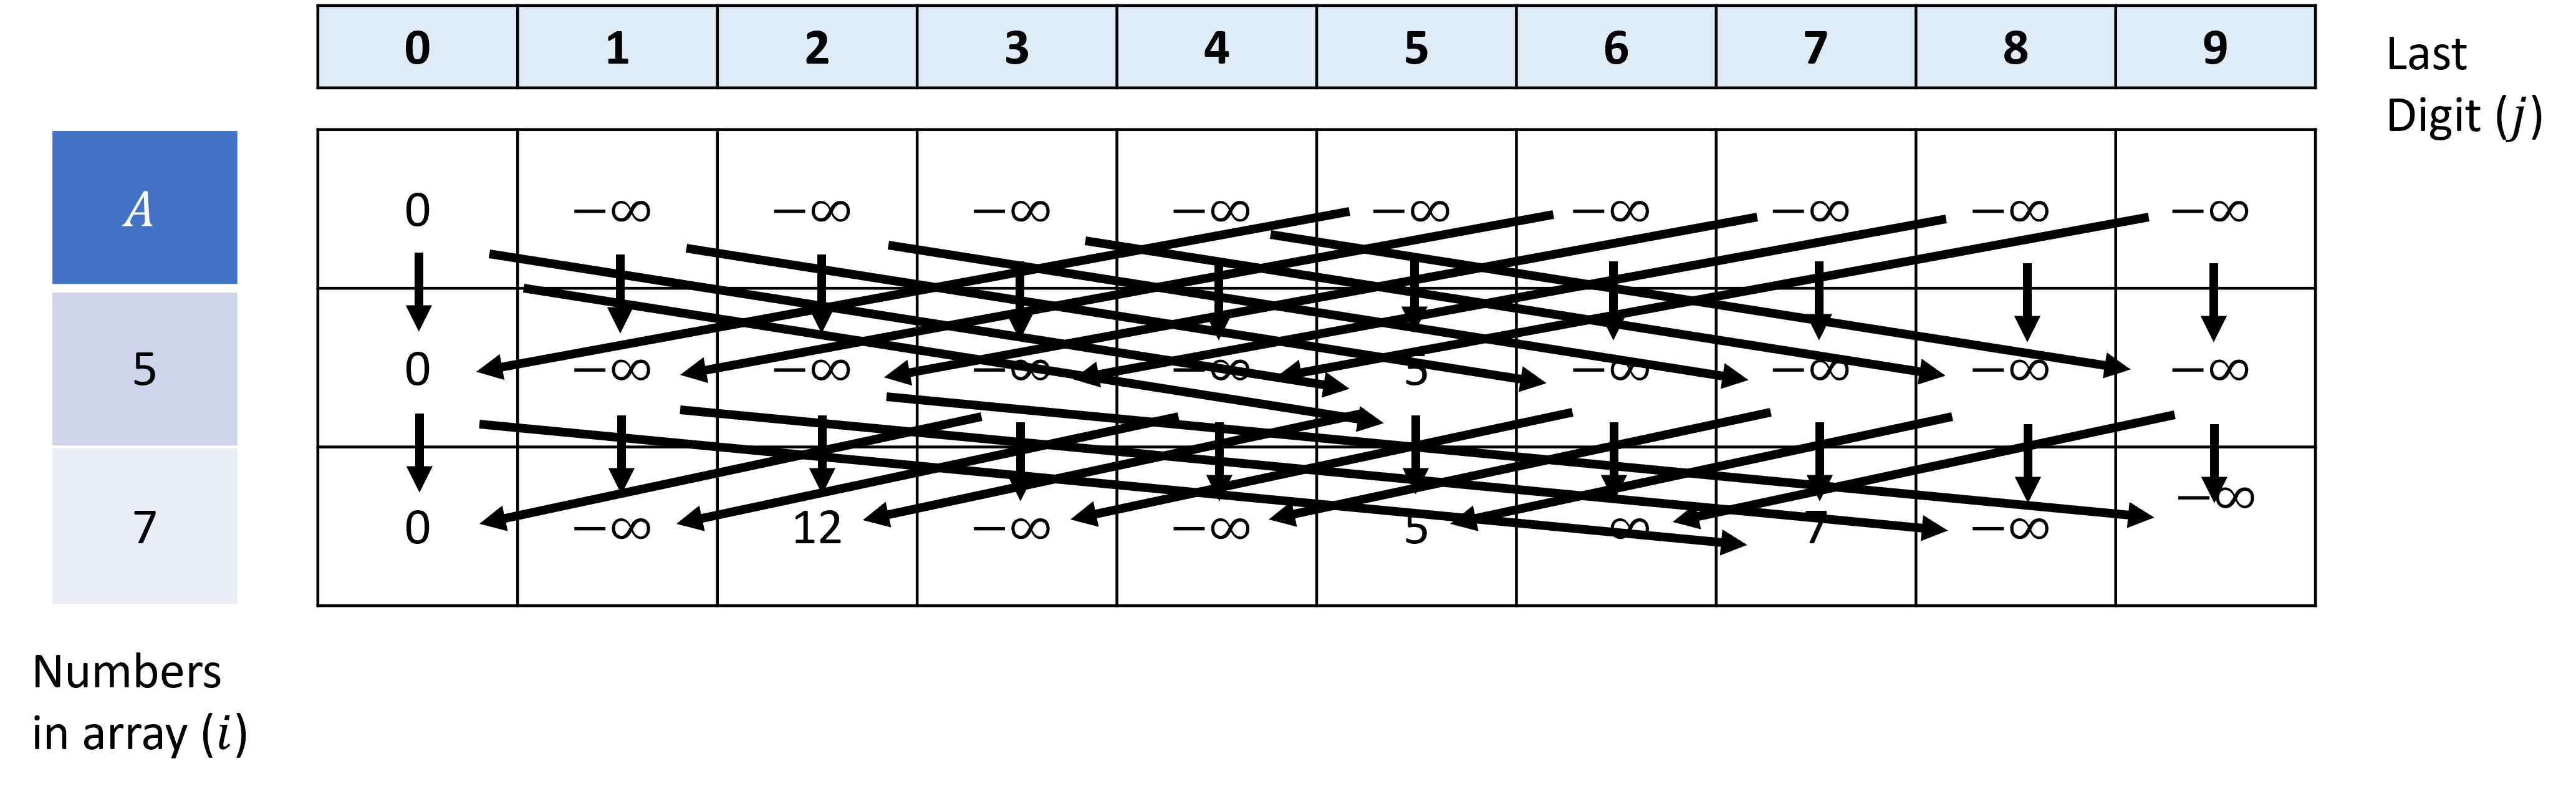

A partir del grafo, podemos denotar que para un subproblema en particular, necesitamos conocer las soluciones de los subproblemas de la cantidad previa de elementos, o lo que se podría entender como conocer los elementos de la fila anterior al elemento que buscamos calcular. Dado esto, el algoritmo hará un recorrido tradicional sobre la matriz

#### Desarrollo de algoritmo de Programación Dinámica

In [130]:
import numpy as np
import sys

def DynamicProgramming_ArraySumByDigit(A):
    # Get the optimal value to dynamic programming approach
    n = len(A)
    S = np.zeros(shape=(n+1,10),dtype=int)
    large_negative = -10**9       #Informal infinity representation as python infinity is taken as float
    for i in range(n+1):
        for j in range(10):
            if j==0 and i==0: S[i,j] = 0
            if j>0 and i==0: S[i,j] = -1000
            if i>0:
                S[i,j] = max(S[i-1,j],S[i-1,(j-A[i-1])%10]+A[i-1])
    
    #Get answer set represented by boolean array
    answer = np.zeros(shape = n, dtype=bool)
    if S[n,0]<0: return -np.inf , answer
    i = n
    j = 0
    while i>0:
        if S[i-1,(j-A[i-1])%10]+A[i-1] > S[i-1,j]:
            answer[i-1] = True
            j = (j-A[i-1])%10
        i-=1
    return S[n,0] , answer
    

A = np.array([5,7,12,3,15,11])
s , S = DynamicProgramming_ArraySumByDigit(A)
if s>0: print(f'A partir de {list(A)}, la suma más grande terminada en 0 es {s} = {" + ".join(str(n) for n in A[S])}')
else: print(f'A partir de {A}, no es posible tener una suma terminada en 0')

A partir de [5, 7, 12, 3, 15, 11], la suma más grande terminada en 0 es 50 = 5 + 7 + 12 + 15 + 11


El siguiente paso es determinar la complejidad temporal y espacial de esta solción:

1. **Complejidad Temporal**: Para la complejidad temporal, vamos a analizar el algoritmo en dos partes, la primera parte está ligada a la búsqueda del valor óptimo, mientras que la segunda parte es la que reconstruye la configuración asociada al valor óptimo.

    1.1 **Primera Parte**: En esta primera parte, podemos denotar que el algoritmo se basa en recorrer una matriz de dimensiones $10 \times (n+1)$, dado que el 10 es fijo y constante independientemente del tamaño de la entrada, nos permite concluir que la solución es de orden $O(n)$

    1.2 **Segunda Parte**: En esta segunda parte, podemos denotar que el algoritmo se basa en recuperar la solución con un ciclo que parte de $i=n$ y se detiene cuando $i=0$, lo que nos permite concluir $O(n)$

Esto nos permite concluir que el algoritmo tiene complejidad temporal de $O(n)+O(n) = O(n)$

1. **Complejidad Espacial**: Para la complejidad espacial, vamos a analizar el algoritmo en las mismas dos partes.

    1.1 **Primera Parte**: En esta primera parte, podemos denotar que el algoritmo se basa en recorrer una matriz de dimensiones $10 \times (n+1)$, que debió ser construida y alimentada con la solución de cada subproblema. Por consiguiente, el orden temporal de dicha estructura es de $O(n)$

    1.2 **Segunda Parte**: En esta segunda parte, podemos denotar que el algoritmo se basa en recuperar la solución con un ciclo que parte de $i=n$ y se detiene cuando $i=0$ almacenando la solución en un arreglo booleano de tamaño $n$, lo que nos permite concluir que esta parte es de orden $O(n)$

Esto nos permite concluir que el algoritmo tiene complejidad espocial de $O(n)+O(n) = O(n)$
